<a href="https://colab.research.google.com/github/JazmineOrtizMarin/Simulaci-n-2/blob/main/MM1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Simulación M/M/1**

# Introducción

En este  estudiaremos la simulación de un proceso de **Nacimientos y Muertes**,
en particular el sistema de colas **M/M/1**.

Este tipo de sistema se caracteriza por:

- Llegadas según un proceso Poisson con tasa \\(\lambda\\).
- Servicios con tiempos exponenciales de parámetro \\(\mu\\).
- Un solo servidor.

El propósito es simular las llegadas, las salidas y observar el número de clientes
en el sistema, además de estimar probabilidades estacionarias mediante el tiempo
pasado en cada estado.


In [29]:
import random
from math import exp, log
from math import inf as infinity
import matplotlib.pyplot as plt
from statistics import mean

In [30]:
# Parámetros
tpll = 2.0
tps = 1.0
T = 100
N = 0
t = 0.0

# Listas
tiempos = [t]
clientes = [N]

##Sin muertes:

En un proceso de **nacimiento puro**, solamente ocurren llegadas.  
Cada llegada incrementa el número de clientes:

$$
N(t^+) = N(t) + 1
$$

Los tiempos entre llegadas siguen una distribución exponencial:

$$
T_{\text{llegada}} \sim \text{Exp}(\lambda)
$$

Recordemos que si el parámetro del modelo es `tpll`, entonces:

$$
\lambda = \frac{1}{\text{tpll}}
$$

La idea básica es sumar tiempos exponenciales hasta alcanzar el horizonte de
simulación \(T\), mientras registramos el número de clientes.


In [31]:
# Simulación
while t <= T:
    N = N + 1
    t = t + random.expovariate(1 / tpll)
    tiempos.append(t)
    clientes.append(N)

In [32]:
# Resultado
print("Número de clientes en el sistema durante el intervalo:", N)

Número de clientes en el sistema durante el intervalo: 48


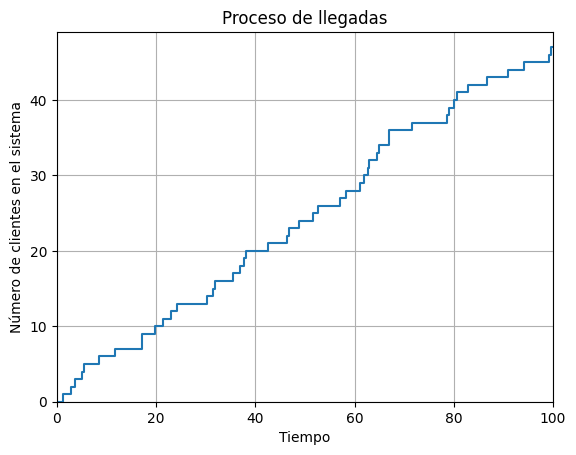

In [33]:
# Gráfica tipo escalón
plt.step(tiempos, clientes, where="post")
plt.xlabel("Tiempo")
plt.ylabel("Número de clientes en el sistema")
plt.title("Proceso de llegadas")
plt.xlim(0, T)
plt.ylim(0, max(clientes) + 1)
plt.grid(True)
plt.show()

## Proceso de Nacimiento y Muerte (M/M/1)

Un sistema M/M/1 permite **llegadas** y **salidas**.

En cada paso generamos:

- Un tiempo hasta la próxima llegada:
  $$
  t_{\ell} \sim \text{Exp}(\lambda)
  $$
- Un tiempo hasta la próxima salida:
  $$
  t_s \sim \text{Exp}(\mu)
  $$

Luego comparamos cuál ocurre primero:

- Si \(t_{\ell} < t_s\), ocurre **llegada**:
  $$
  N(t^+) = N(t) + 1
  $$

- Si \(t_s < t_{\ell}\), ocurre **salida** (si el sistema no está vacío):
  $$
  N(t^+) = N(t) - 1
  $$

Este proceso define una **cadena de Markov continua** con estados  
(0,1,2, ...), y transiciones controladas por las tasas (lambda) y \(mu\).


In [34]:
t = 0.0
N = 0

X = []
Y = []

# Simulación
while t <= T:

    # generar tiempos
    tll = random.expovariate(1.0 / tpll) # llegada
    ts  = random.expovariate(1.0 / tps) # servicio

    # evento: llegada
    if tll < ts:
        N += 1
        t += tll
        X.append(t)
        Y.append(N)

    # evento: salida
    else:
        if N > 0:
            N -= 1
        t += ts
        X.append(t)
        Y.append(N)

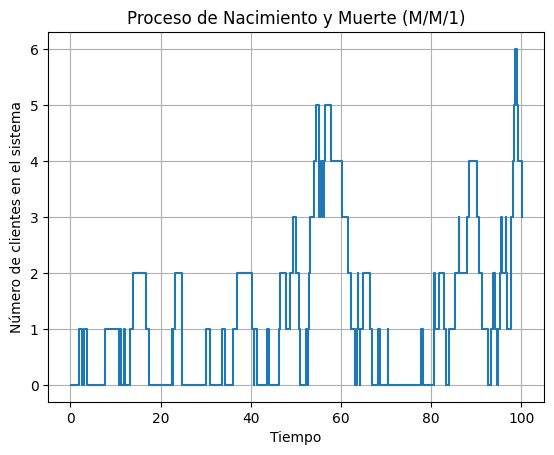

In [35]:
# Gráfica escalonada X vs Y
plt.step(X, Y, where="post")
plt.xlabel("Tiempo")
plt.ylabel("Número de clientes en el sistema")
plt.title("Proceso de Nacimiento y Muerte (M/M/1)")
plt.grid(True)
plt.show()

In [36]:
t = 0.0
N = 0

X = []
Y = []

# Simulación nacimiento y muerte
while t <= T:

    # generar tiempos
    tll = random.expovariate(1.0 / tpll)  # llegada
    ts  = random.expovariate(1.0 / tps)   # servicio

    # evento: llegada
    if tll < ts:
        N += 1
        t += tll
        X.append(t)
        Y.append(N)

    # evento: salida
    else:
        if N > 0:
            N -= 1
        t += ts
        X.append(t)
        Y.append(N)

In [37]:
lamda = 4.0
mu = 6.0

num_pkts = 100000
#T = 100000
count = 0
t = 0
N = 0

tll = random.expovariate (lamda) #*** revisar ese random.expovariate que deberia ser solo expovariate xdxd
ts = infinity

t_evento_anterior = 0.0

# Varables de salida
tll_data = []
ts_data = []
r_data = []
area = []

while count < num_pkts:
  if tll < ts:
    t = tll
    tll_data.append(t)

    # Area dell escalon
    area.append((t - t_evento_anterior) * N)
    t_evento_anterior = t

    N = N + 1.0
    tll = t + random.expovariate(lamda)
    if N == 1:
      ts = t + random.expovariate(mu)
  else:
    t = ts
    ts_data.append(t)
    area.append((t - t_evento_anterior) * N)
    t_evento_anterior = t

    N = N - 1.0
    count = count +1
    if N > 0:
      ts = t + random.expovariate(mu)
    else:
      ts = infinity

In [38]:
# Estimación del retraso promedio
for i in range (num_pkts):
  d = ts_data[i] - tll_data[i]
  r_data.append(d)

print ("Retraso promedio = W = ", round (mean (r_data), 4))
print ("E[N(t)] = L = ", round (sum(area)/t, 4))

Retraso promedio = W =  0.4958
E[N(t)] = L =  1.978


In [40]:
# Estimar P(N = x) a partir del tiempo en cada estado

tiempo_por_estado = {}

for i in range(len(X) - 1):
    dt = X[i+1] - X[i]   # duración del escalón
    n_estado = Y[i]      # número de clientes en ese intervalo

    if n_estado not in tiempo_por_estado:
        tiempo_por_estado[n_estado] = 0.0

    tiempo_por_estado[n_estado] += dt

tiempo_total = X[-1] - X[0]

print("Probabilidades estimadas P(N = x):\n")
for n in sorted(tiempo_por_estado.keys()):
    p_n = tiempo_por_estado[n] / tiempo_total
    print(f"P(N = {n}) ≈ {p_n:.4f}")


Probabilidades estimadas P(N = x):

P(N = 0) ≈ 0.6762
P(N = 1) ≈ 0.2018
P(N = 2) ≈ 0.0963
P(N = 3) ≈ 0.0095
P(N = 4) ≈ 0.0162


In [41]:
lamda_teo = 1.0 / tpll
mu_teo = 1.0 / tps
rho = lamda_teo / mu_teo

print("\nComparación con la distribución teórica (M/M/1):")
for n in sorted(tiempo_por_estado.keys()):
    p_sim = tiempo_por_estado[n] / tiempo_total
    if rho < 1:
        p_teo = (1 - rho) * (rho ** n)
    else:
        p_teo = float('nan')
    print(f"n = {n:2d} | P_sim ≈ {p_sim:.4f} | P_teo ≈ {p_teo:.4f}")


Comparación con la distribución teórica (M/M/1):
n =  0 | P_sim ≈ 0.6762 | P_teo ≈ 0.5000
n =  1 | P_sim ≈ 0.2018 | P_teo ≈ 0.2500
n =  2 | P_sim ≈ 0.0963 | P_teo ≈ 0.1250
n =  3 | P_sim ≈ 0.0095 | P_teo ≈ 0.0625
n =  4 | P_sim ≈ 0.0162 | P_teo ≈ 0.0312
